
## IV. SIRを書く(1)————シンプルなSIR
(完全版: <https://colab.research.google.com/drive/17XoCUWzPlk3SU0rwduAaEh3kqqOGXuxJ?usp=sharing>) 
- `S`，`I`，`R`  
- 連続値なので小数点以下がある: `float`  
- 複数のグループがある: `np.array`  
- 時系列: `list`に入れる  
- 初期値:    
- `S`，`I`，`R`には初期値を与える必要がある      
- `S`: 総人口ではなく割合と考えて，すべて1とする      
- `I`: 適当な割合を入れる      
- `R`の初期値は計算に影響しないので，通常はゼロベクトルとする 
- 便利のため`ZEROS`，`ONES`を作っておく:  
- それぞれゼロベクトル，1ベクトル．`GROUPS`ベクトルと同じshape

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#初期値
#S=[np.array([[1.],[1.],[1.]])] #1のあとに.をかかないとintになる
#I=[np.array([[1/3],[.0],[.0]])]
#R=[np.array([[.0],[.0],[.0]])]

GROUPS=[['A'],['B'],['C']]#頭文字をおおきくするクラスに,全部大きくすると定数，全部小文字だと変数

ones=np.ones_like(GROUPS,dtype=float)
zeros=np.zeros_like(GROUPS,dtype=float)

S=[ones]
I=[zeros]
R=[zeros]

I[0][0][0]=0.001

print(I)


[array([[0.001],
       [0.   ],
       [0.   ]])]



### パラメーターβ，γ，R0

- パラメーターβ，γ，R0を与える必要がある 
- γは共通でもよい(それほど差が出ないと思われるので)
- β，R0は通常グループごとに設定する(そうしないとグループ間の差が生まれない)
- βを行列にした場合は，接触したSとIの組み合わせごとに接触割合を設定できる- `*`は，  
- 行列またはベクトル同士のときはアダマール積といい，要素同士の積を計算する(内積ではない)  
- 行列またはベクトルとスカラーのときはスカラー倍になる

In [2]:
R0=1
gamma=ones*1/15
beta=ones*R0*gamma
#beta=np.array(
    [[0.06666667]
 [0.06666667]
 [0.06666667]])
print(beta)

[[0.06]
 [0.03]
 [0.1 ]]


### 関数

関数を2つに分ける(今回の場合わけなくていいかも)．

`calc()`のように，引数だけで計算し，返すことで，意図しない書き換えから保護するテクニックがある．実際`S`．`I`，`R`が一番外側(グローバル)で定義されているので，どこからでも書き換えられるけど，あんまりよろしくない．

```
def calc(s, i ,r):
    ……

def run(TMAX=100):
    ……
```

In [3]:
def calc(s, i ,r):
  ds=-beta*s*sum(i)/len(GROUPS)
  dr=gamma*i
  di=-ds-dr
  return s+ds,i+di,r+dr

def run(TMAX=100):
  for i in range(TMAX):
    news,newi,newr=calc(S[i],I[i],R[i])
    S.append(news)
    I.append(newi)
    R.append(newr)

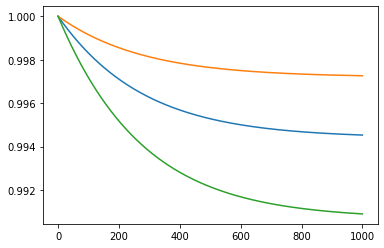

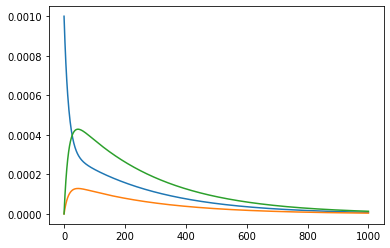

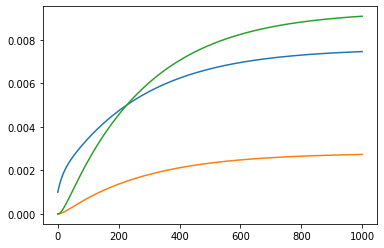

In [4]:
run(TMAX=1000)


def plotdata(V):
    plt=[[],[],[]]
    for v in V:
        plt[0].append(v[0])
        plt[1].append(v[1])
        plt[2].append(v[2])
    return plt

def plotall():
    s=plotdata(S)
    i=plotdata(I)
    r=plotdata(R)
    plt.plot(s[0])
    plt.plot(s[1])
    plt.plot(s[2])
    plt.show()

    plt.plot(i[0])
    plt.plot(i[1])
    plt.plot(i[2])
    plt.show()
    
    plt.plot(r[0])
    plt.plot(r[1])
    plt.plot(r[2])
    plt.show()

plotall()